In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture as gmm
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("./(최종)통합데이터.csv",encoding="cp949")
df.head()

,역사명,동별,위도,경도,일평균승하차(명),상가 면적,공실면적(㎡)(2024년기준),거주자수,남여비율,1인 가구수 레벨,...,20~40대 인구 수 레벨,고속버스 터미널,기차,여객 터미널,주변 관광지,주변 대학교,일평균(원),kmeans_group,gmm_group,kmedoids
0,가야,가야1동,35.155883,129.042817,5799,11.0,11.0,25217,0.95,83,...,57,NaN,1.0,NaN,0,0,1926082,0,0,3
1,감전,감전동,35.155528,128.991146,6107,10.0,10.0,12825,1.12,56,...,31,NaN,NaN,NaN,0,0,2535118,0,0,3
2,강서구청,대저1동,35.211247,128.981756,4251,NaN,NaN,2076,1.22,26,...,4,NaN,NaN,NaN,0,0,2029127,0,0,3
3,개금,개금1동,35.153284,129.020533,13621,37.0,0.0,27187,0.94,79,...,65,NaN,NaN,NaN,0,1,4717075,3,0,1
4,거제(법원·검찰청),거제3동,35.188589,129.073941,9546,16.0,0.0,27403,0.91,14,...,13,NaN,NaN,NaN,0,1,3099526,0,0,3


In [4]:
use_df = df[['역사명','일평균승하차(명)', '1인 가구수(세대)','사업체수', '일평균(원)']]
use_df.head()

,역사명,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원)
0,가야,5799,6291,49,1926082
1,감전,6107,5461,57,2535118
2,강서구청,4251,4630,109,2029127
3,개금,13621,2501,36,4717075
4,거제(법원·검찰청),9546,3093,114,3099526


In [14]:
use_df.isnull().sum()

역사명           0
일평균승하차(명)     0
1인 가구수(세대)    0
사업체수          0
일평균(원)        0
dtype: int64

In [5]:
use_df.fillna(0,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_32348\1621720596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df.fillna(0,inplace=True)


In [5]:
use_df.set_index(use_df["역사명"], inplace=True)

In [6]:
a = use_df.copy()

In [7]:
a.drop(columns="역사명",inplace=True)

In [18]:
a

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원)
역사명,,,,
가야,5799,6291,49,1926082
감전,6107,5461,57,2535118
강서구청,4251,4630,109,2029127
개금,13621,2501,36,4717075
거제(법원·검찰청),9546,3093,114,3099526
...,...,...,...,...
충렬사(안락),5398,1851,35,1117126
토성,13846,2110,7,6002230
하단,29080,4414,36,11010043


### GMM

In [10]:
from sklearn.mixture import GaussianMixture as gmm

gm = gmm(n_components=4,random_state=42)    # n_components : 군집화의 개수
labels = gm.fit_predict(a)

In [11]:
for i in range(0,4):
    print(np.count_nonzero(labels == i))

25
19
55
1


In [12]:
labels

array([0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2,
       0, 3, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2], dtype=int64)

In [13]:
a['gmm_group'] = labels
a.head()

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원),gmm_group
역사명,,,,,
가야역,5799,6291,49,1926082,0
감전역,6107,5461,57,2535118,0
강서구청,4251,4630,109,2029127,0
개금역,13621,2501,36,4717075,2
거제(법원·검찰청),9546,3093,114,3099526,2


In [14]:
group_3 = a[a['gmm_group']==3]
group_3

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원),gmm_group
역사명,,,,,
서면역,57826,4449,380,39388852,3


In [15]:
group_2 = a[a['gmm_group']==2]
group_2

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원),gmm_group
역사명,,,,,
개금역,13621,2501,36,4717075,2
거제(법원·검찰청),9546,3093,114,3099526,2
광안역,16701,2424,108,6932781,2
괴정,15271,4835,42,5103298,2
구남역,7021,2029,16,2848324,2
구서,15857,2774,66,6933445,2
구포,5530,1733,54,4080959,2
국금융센터·부산은행역,8248,1752,0,1318702,2
금곡역,3881,2827,13,4943795,2


In [16]:
group_1 = a[a['gmm_group']==1]
group_1

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원),gmm_group
역사명,,,,,
경성부경대역,24395,3694,83,10345206,1
교대,22544,3761,0,6656075,1
남포,28802,1762,12,9296111,1
노포,19370,5628,6,6881813,1
동래,28565,4246,118,10257972,1
범일,25681,3104,82,8678939,1
부산,30061,3391,198,11733629,1
부산대,24167,3939,70,13975371,1
부전,28422,5359,131,7561376,1


In [17]:
group_0 = a[a['gmm_group']==0]
group_0

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원),gmm_group
역사명,,,,,
가야역,5799,6291,49,1926082,0
감전역,6107,5461,57,2535118,0
강서구청,4251,4630,109,2029127,0
구명역,5185,3035,32,1670759,0
다대포항,6221,6767,22,2063936,0
다대포해수욕장,7761,5207,11,2570784,0
대티,6290,4088,36,2345497,0
덕포역,6581,4655,16,2626173,0
동부산대학(윗반송),4320,6463,12,1293955,0


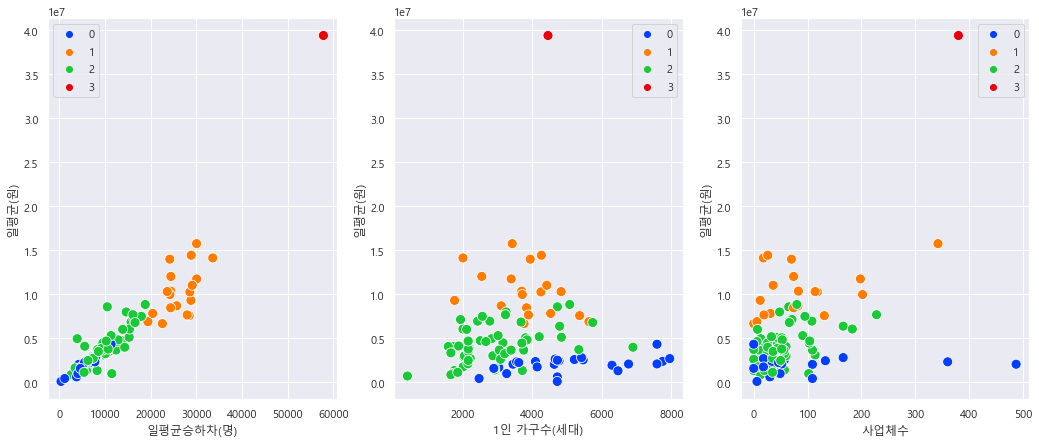

In [18]:
# GMM 군집4
plt.figure(figsize=(30,7))

plt.subplot(151)    
sns.scatterplot(x=a.iloc[:,0], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(152)
sns.scatterplot(x=a.iloc[:,1], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(153)  
sns.scatterplot(x=a.iloc[:,2], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')



plt.show()

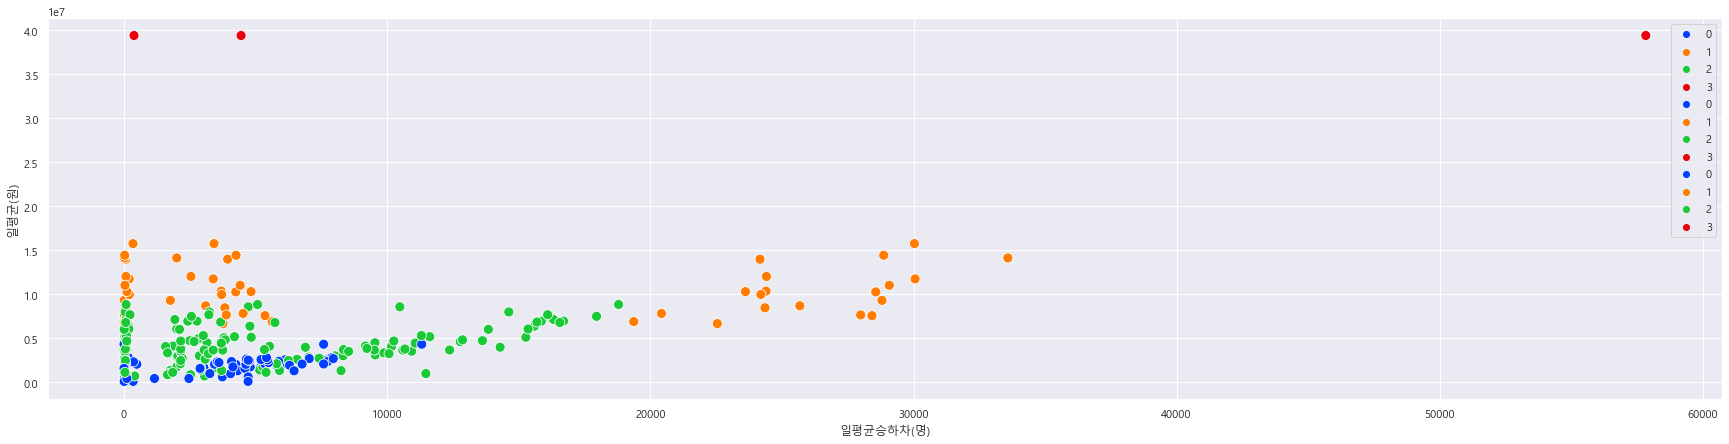

In [20]:
# GMM 군집4(한번에 출력)
plt.figure(figsize=(30,7))

#X= a

sns.scatterplot(x=a.iloc[:,0], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

sns.scatterplot(x=a.iloc[:,1], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

sns.scatterplot(x=a.iloc[:,2], y=a.iloc[:,3], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')


plt.show()

In [21]:
# gmm 군집 4
a.groupby(['gmm_group']).mean()

,일평균승하차(명),1인 가구수(세대),사업체수,일평균(원)
gmm_group,,,,
0,5740.880000,5006.240000,75.040000,2.008011e+06
1,26240.578947,3805.631579,86.105263,1.036085e+07
2,10474.618182,2941.072727,54.527273,4.213429e+06
3,57826.000000,4449.000000,380.000000,3.938885e+07


In [22]:
# 한번에 저장
a.to_csv("GMM(정규화X).csv",encoding='cp949')

In [73]:
# GMM_group_0 = (group_0.reset_index())["역사명"]
# GMM_group_1 = (group_1.reset_index())["역사명"]
# GMM_group_2 = (group_2.reset_index())["역사명"]
# GMM_group_3 = (group_3.reset_index())["역사명"]

In [74]:
# # gmm 클러스터별 파일 생성
# GMM_group_0.to_excel("gmm_group_0.xlsx")
# GMM_group_1.to_excel("gmm_group_1.xlsx")
# GMM_group_2.to_excel("gmm_group_2.xlsx")
# GMM_group_3.to_excel("gmm_group_3.xlsx")